In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Cause plots to be displayed in the notebook:
%matplotlib inline

In [79]:
def twoD_Gaussian(x,y, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g= offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g 

In [80]:
def coupled_oscillator_energy_force(x,y,d0=5.0,a=1.0,k=1.0,lamb=2.278):
    #calculate the energy on force on the right hand side of the equal signs
    energy = d0*(x**2.0-a**2.0)**2.0 + 0.5*k*y**2.0 + lamb*x*y 
    force_x = -(2.0*d0*(x**2.0-a**2.0)*2.0*x + lamb*y) 
    force_y = -(k*y + lamb*x)
 
    return energy, force_x, force_y

In [83]:
def plot_energy_force(function, xmin=-2,xmax=2,spacing=0.05,**kwargs):
    x_points = np.arange(xmin,xmax+spacing,spacing)
    y_points = np.arange(xmin,xmax+spacing,spacing)
    X, Y = np.meshgrid(x_points, y_points)                   # need 2D-plot
    energies, xforces, yforces = function(X,Y,**kwargs)
    print ([np.shape(energies)])
    
    nlocalminima=100
    nx=np.zeros(np.shape(energies)) 
    
    # should really be adding a 2d gaussian kernal centered at each point 
    for i,j in np.random.randint(0,81,(nlocalminima,2)):
     nx[i,j]=5*np.random.randn()
    
    energies=energies # - np.abs(nx)
    
    plt.figure()
    label = 'U(x)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    levels = np.arange(-20.0, 15.0, 0.5)   # contour ranges
    CS = plt.contour(X, Y, energies, levels=levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('%s'%label)
    plt.xlabel('x-position')
    plt.ylabel("y-position")
    plt.legend(loc=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(81, 81)]


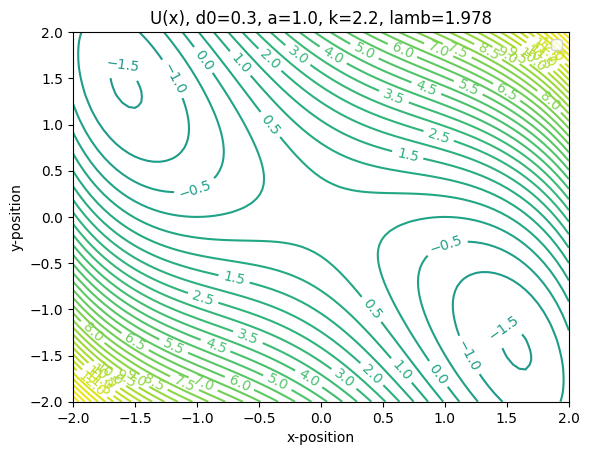

In [96]:
plot_energy_force(coupled_oscillator_energy_force,d0=0.3,a=1.0,k=2.2,lamb=1.978)

<a list of 19 text.Text objects>

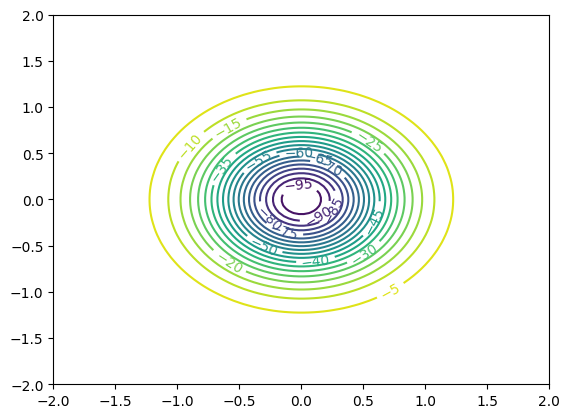

In [14]:
x_points = np.linspace(-2,2,100)
y_points = np.linspace(-2,2,100)
X, Y = np.meshgrid(x_points, y_points)   
Z= twoD_Gaussian(X, Y, amplitude=-100.0, xo=0.0, yo=0.0, sigma_x=0.5, sigma_y=0.5, theta=0, offset=0)
CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=1, fontsize=10)

<a list of 77 text.Text objects>

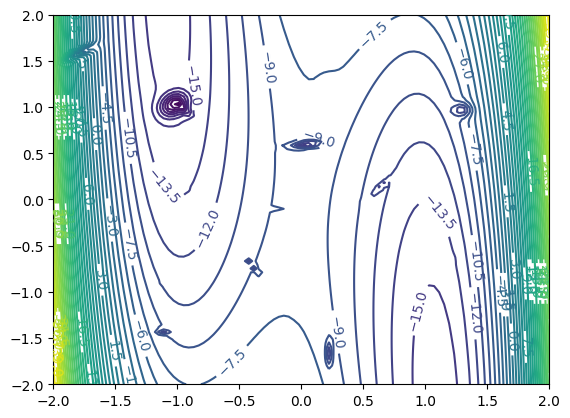

In [123]:
xmin,xmax=-2,2
x_points = np.linspace(-2,2,100)
y_points = np.linspace(-2,2,100)
X, Y = np.meshgrid(x_points, y_points)  
nlocalminima=20
energies, xforces, yforces = coupled_oscillator_energy_force(X,Y,d0=5.0,a=1.0,k=1.0,lamb=2.078)
# this generate a surface of local minima 
nx=np.zeros((100,100)) 
for _ in range(nlocalminima):
    amp=-5*np.abs(np.random.randn())
    offset=-1*np.abs(np.random.randn())
    xo,yo=4*np.random.rand(2)-2
    sigma_x,sigma_y=0.1*np.random.rand(2)
    theta=np.pi*np.random.randn()
    nx=nx+twoD_Gaussian(X, Y, amp, xo, yo, sigma_x, sigma_y, theta, offset)
Z= nx + energies # nx
CS = plt.contour(X, Y, Z, levels=50)
plt.clabel(CS, inline=1, fontsize=10)

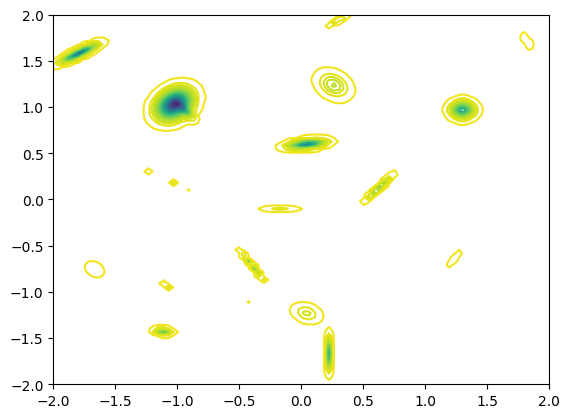

In [124]:
CS = plt.contour(X, Y, nx, levels=50)

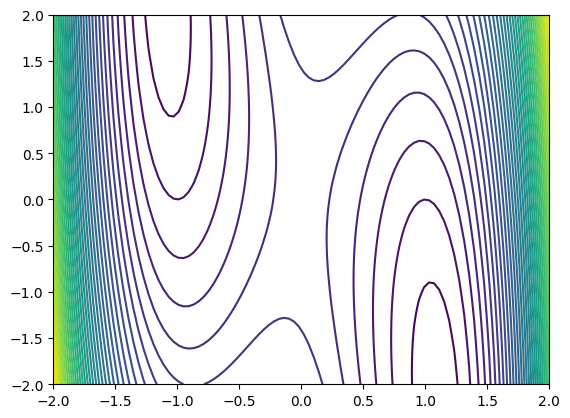

In [125]:
CS = plt.contour(X, Y, energies, levels=50)